In [1]:
import pandas as pd
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.cluster import BisectingKMeans
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Cargar los datos
data = pd.read_excel('DATA GUACHER.xlsx')

In [3]:
# Analisis descriptivo de la data
data.describe()

,Cantidad_pacientes,porcentaje_consulta
count,547.000000,547.000000
mean,70.365631,0.832505
std,45.029434,0.203065
min,5.000000,0.050000
25%,30.000000,0.775000
50%,60.000000,0.900000
75%,110.000000,1.000000
max,190.000000,1.000000


In [4]:
# Analisis descriptivo de la data
data.describe(include=['object'])

,ONE KEY,REPRESENTANTE,CUSTOMER_ID,CLIENTE,tipo_consulta,especialidad,segmento
count,546,547,503,547,547,547,547
unique,545,4,502,546,2,19,3
top,WCOM00298076,"MARCELO FORERO, SANDRA PATRICIA",964867000001265,ROJAS RODRIGUEZ KATTERINE LORIETT,benigna,HEMATOLOGO,B
freq,2,170,2,2,346,139,253


In [6]:
B = pd.DataFrame(data[data['tipo_consulta']== 'benigna'])
B_OneKey = B[['ONE KEY']]
B_OneKey.reset_index(drop = True, inplace = True)
B = B[['Cantidad_pacientes','porcentaje_consulta']]
EscaladorB = MinMaxScaler().fit(B.values)
B = pd.DataFrame(EscaladorB.transform(B.values), columns = ['Cantidad_pacientes','porcentaje_consulta'])

M = pd.DataFrame(data[data['tipo_consulta']== 'maligna'])
M_OneKey = M[['ONE KEY']]
M_OneKey.reset_index(drop = True, inplace = True)
M = M[['Cantidad_pacientes','porcentaje_consulta']]
EscaladorM = MinMaxScaler().fit(M.values)
M = pd.DataFrame(EscaladorM.transform(M.values), columns = ['Cantidad_pacientes','porcentaje_consulta'])

,Cantidad_pacientes,porcentaje_consulta
0,0.243243,1.000000
1,0.675676,0.473684
2,0.243243,1.000000
3,0.621622,0.473684
4,0.243243,1.000000
...,...,...
341,0.054054,1.000000
342,0.081081,1.000000
343,0.189189,0.263158
344,0.081081,1.000000


In [8]:
inertiasBenigna_kmeans = []
inertiasMaligna_kmeans = []
inertiasBenigna_Bisectingkmeans = []
inertiasMaligna_Bisectingkmeans = []

for i in range(1,11):
    kmeansBenigna = KMeans(n_clusters=i)
    kmeansBenigna.fit(B.values)
    inertiasBenigna_kmeans.append(kmeansBenigna.inertia_)
    kmeansMaligna = KMeans(n_clusters=i)
    kmeansMaligna.fit(M.values)
    inertiasMaligna_kmeans.append(kmeansMaligna.inertia_)
    BisectingkmeansBenigna = BisectingKMeans(n_clusters=i)
    BisectingkmeansBenigna.fit(B.values)
    inertiasBenigna_Bisectingkmeans.append(kmeansBenigna.inertia_)
    BisectingkmeansMaligna = BisectingKMeans(n_clusters=i)
    BisectingkmeansMaligna.fit(M.values)
    inertiasMaligna_Bisectingkmeans.append(kmeansMaligna.inertia_)

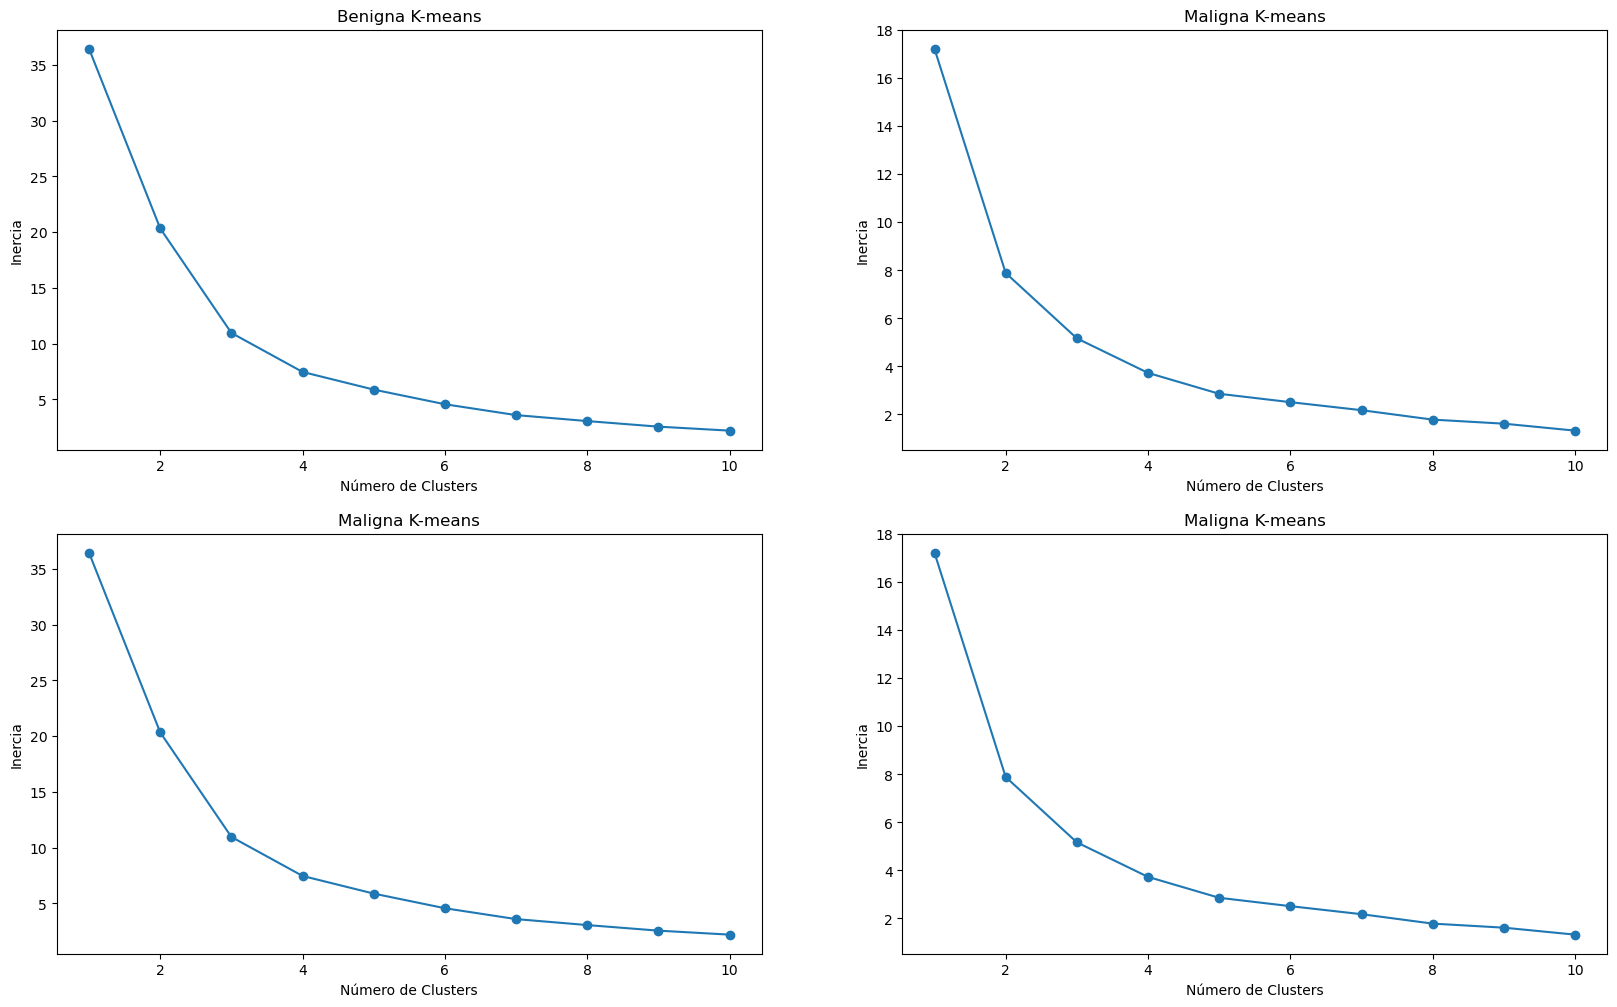

In [9]:
fig, axs = plt.subplots(2,2,squeeze=False, figsize =(20,12))
axs[0][0].plot(range(1,11), inertiasBenigna_kmeans, marker='o')
axs[0][0].set_title("Benigna K-means")
axs[0][0].set_xlabel("Número de Clusters")
axs[0][0].set_ylabel("Inercia")

axs[0][1].plot(range(1,11), inertiasMaligna_kmeans, marker='o')
axs[0][1].set_title("Maligna K-means")
axs[0][1].set_xlabel("Número de Clusters")
axs[0][1].set_ylabel("Inercia")

axs[1][0].plot(range(1,11), inertiasBenigna_Bisectingkmeans, marker='o')
axs[1][0].set_title("Maligna K-means")
axs[1][0].set_xlabel("Número de Clusters")
axs[1][0].set_ylabel("Inercia")

axs[1][1].plot(range(1,11), inertiasMaligna_Bisectingkmeans, marker='o')
axs[1][1].set_title("Maligna K-means")
axs[1][1].set_xlabel("Número de Clusters")
axs[1][1].set_ylabel("Inercia")

plt.show()

In [10]:
num_clusters = 4

kmeansB = KMeans(n_clusters = num_clusters).fit(B.values)
kmeansM = KMeans(n_clusters = num_clusters).fit(M.values)

bisectionkmeansB = BisectingKMeans(n_clusters = num_clusters).fit(B.values)
bisectionkmeansM = BisectingKMeans(n_clusters = num_clusters).fit(M.values)

hierarchical_cluster_B = AgglomerativeClustering(n_clusters=num_clusters, affinity='euclidean', linkage='ward').fit_predict(B.values)
hierarchical_cluster_M = AgglomerativeClustering(n_clusters=num_clusters, affinity='euclidean', linkage='ward').fit_predict(M.values)


In [11]:
centroides = kmeansB.cluster_centers_
etiquetas = kmeansB.labels_
B['etiquetas']=kmeansB.labels_

B1 = B[B['etiquetas']==0]
B2 = B[B['etiquetas']==1]
B3 = B[B['etiquetas']==2]
B4 = B[B['etiquetas']==3]

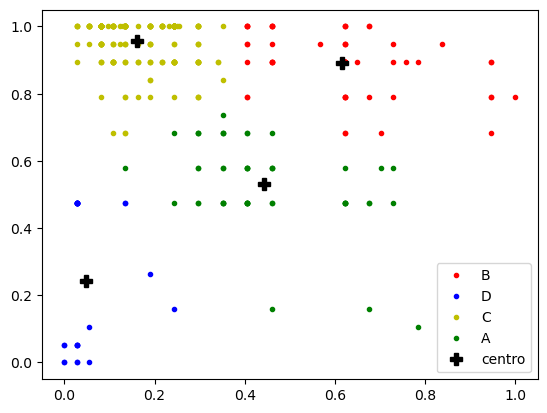

In [12]:
plt.plot(B1['Cantidad_pacientes'],B1['porcentaje_consulta'],'r.', label='B')
plt.plot(B2['Cantidad_pacientes'],B2['porcentaje_consulta'],'b.', label='D')
plt.plot(B3['Cantidad_pacientes'],B3['porcentaje_consulta'],'y.', label='C')
plt.plot(B4['Cantidad_pacientes'],B4['porcentaje_consulta'],'g.', label='A')

plt.plot(centroides[:,0],centroides[:,1],'P',markersize=8, label='centro',c="black")

plt.legend(loc='best')
plt.show()

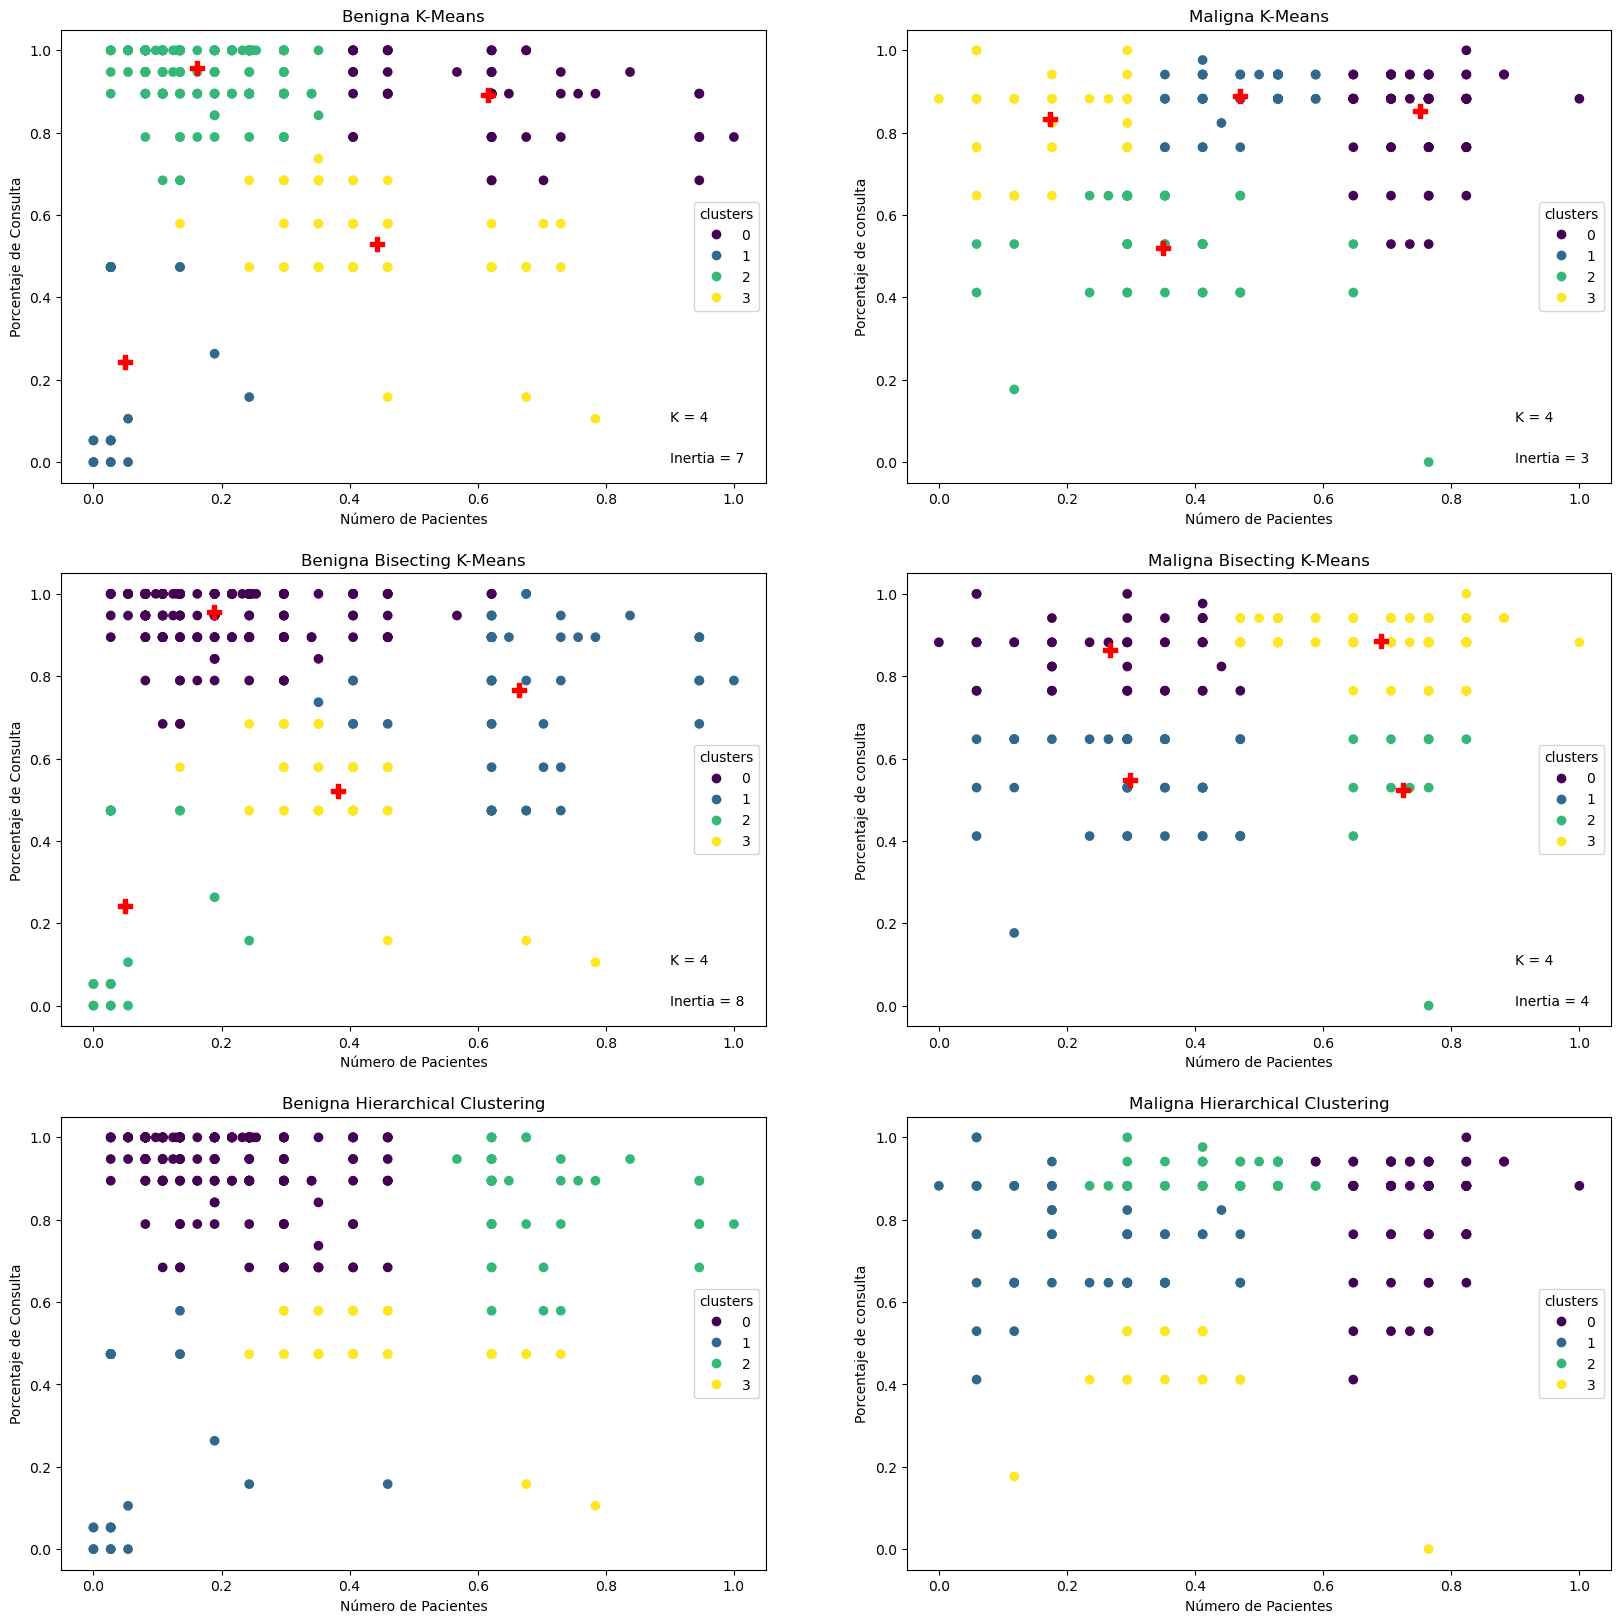

In [13]:
fig, axs = plt.subplots(3,2,squeeze=False, figsize =(20,20))
sc1 = axs[0][0].scatter(B['Cantidad_pacientes'], B['porcentaje_consulta'] , c=kmeansB.labels_ )
axs[0][0].scatter(kmeansB.cluster_centers_[:, 0], kmeansB.cluster_centers_[:, 1], c="r", s=100, marker ="P")
axs[0][0].set_title("Benigna K-Means")
axs[0][0].set_xlabel("Número de Pacientes")
axs[0][0].set_ylabel("Porcentaje de Consulta")
axs[0][0].text(0.9,0.1,'K = %i' % kmeansB.n_clusters)
axs[0][0].text(0.9,0,'Inertia = %i' % kmeansB.inertia_)
axs[0][0].legend(*sc1.legend_elements(), title='clusters', loc = 'center right')

sc2 = axs[0][1].scatter(M['Cantidad_pacientes'], M['porcentaje_consulta'], c=kmeansM.labels_)
axs[0][1].scatter(kmeansM.cluster_centers_[:, 0], kmeansM.cluster_centers_[:, 1], c="r", s=100, marker ="P")
axs[0][1].set_title("Maligna K-Means")
axs[0][1].set_xlabel("Número de Pacientes")
axs[0][1].set_ylabel("Porcentaje de consulta")
axs[0][1].text(0.9,0.1,'K = %i' % kmeansM.n_clusters)
axs[0][1].text(0.9,0,'Inertia = %i' % kmeansM.inertia_)
axs[0][1].legend(*sc2.legend_elements(), title='clusters', loc = 'center right')

sc3 = axs[1][0].scatter(B['Cantidad_pacientes'], B['porcentaje_consulta'] , c=bisectionkmeansB.labels_)
axs[1][0].scatter(bisectionkmeansB.cluster_centers_[:, 0], bisectionkmeansB.cluster_centers_[:, 1], c="r",s=100, marker ="P")
axs[1][0].set_title("Benigna Bisecting K-Means")
axs[1][0].set_xlabel("Número de Pacientes")
axs[1][0].set_ylabel("Porcentaje de Consulta")
axs[1][0].text(0.9,0.1,'K = %i' % bisectionkmeansB.n_clusters)
axs[1][0].text(0.9,0,'Inertia = %i' % bisectionkmeansB.inertia_)
axs[1][0].legend(*sc3.legend_elements(), title='clusters', loc = 'center right')

sc4 = axs[1][1].scatter(M['Cantidad_pacientes'], M['porcentaje_consulta'], c=bisectionkmeansM.labels_)
axs[1][1].scatter(bisectionkmeansM.cluster_centers_[:, 0], bisectionkmeansM.cluster_centers_[:, 1], c="r", s=100, marker ="P")
axs[1][1].set_title("Maligna Bisecting K-Means")
axs[1][1].set_xlabel("Número de Pacientes")
axs[1][1].set_ylabel("Porcentaje de consulta")
axs[1][1].text(0.9,0.1,'K = %i' % bisectionkmeansM.n_clusters)
axs[1][1].text(0.9,0,'Inertia = %i' % bisectionkmeansM.inertia_)
axs[1][1].legend(*sc4.legend_elements(), title='clusters', loc = 'center right')

sc5 = axs[2][0].scatter(B['Cantidad_pacientes'], B['porcentaje_consulta'], c=hierarchical_cluster_B)
axs[2][0].set_title("Benigna Hierarchical Clustering")
axs[2][0].set_xlabel("Número de Pacientes")
axs[2][0].set_ylabel("Porcentaje de Consulta")
axs[2][0].legend(*sc5.legend_elements(), title='clusters', loc = 'center right')

sc6 = axs[2][1].scatter(M['Cantidad_pacientes'], M['porcentaje_consulta'], c=hierarchical_cluster_M)
axs[2][1].set_title("Maligna Hierarchical Clustering")
axs[2][1].set_xlabel("Número de Pacientes")
axs[2][1].set_ylabel("Porcentaje de consulta")
axs[2][1].legend(*sc6.legend_elements(), title='clusters', loc = 'center right')

plt.show()

In [20]:
mapping = {0:'cluster 1',1:'cluster 2',2:'cluster 3', 3:'cluster 4'}
Results_B = kmeansB.labels_
Results_B = [mapping[i] for i in Results_B]

In [19]:
B['ONE KEY'] = B_OneKey
M['ONE KEY'] = M_OneKey

B['Cluster'] = kmeansB.labels_
B['Cluster1'] = Results_B
M['Cluster'] = kmeansM.labels_
B

,Cantidad_pacientes,porcentaje_consulta,etiquetas,ONE KEY,Cluster,Cluster1
0,0.243243,1.000000,2,WCOM00008739,2,cluster 3
1,0.675676,0.473684,3,WCOM00287895,3,cluster 4
2,0.243243,1.000000,2,WCOM00007200,2,cluster 3
3,0.621622,0.473684,3,WCOM00000403,3,cluster 4
4,0.243243,1.000000,2,WCOM00332099,2,cluster 3
...,...,...,...,...,...,...
341,0.054054,1.000000,2,WCOM00335032,2,cluster 3
342,0.081081,1.000000,2,WCOM00266738,2,cluster 3
343,0.189189,0.263158,1,WCOM00288703,1,cluster 2
344,0.081081,1.000000,2,WCOM00285272,2,cluster 3


In [21]:
# Seleccionar solo las características relevantes (excluyendo las columnas de ID)
features_to_use = ['ONE KEY','Cantidad_pacientes', 'tipo_consulta', 'porcentaje_consulta', 'especialidad']

# Seleccionar características (X) y variable objetivo (y)
X = data[features_to_use]
y = data['segmento']

In [17]:
X

,ONE KEY,Cantidad_pacientes,tipo_consulta,porcentaje_consulta,especialidad
0,WCOM00008739,50,benigna,1.0,GENETISTA
1,WCOM00313841,140,maligna,0.7,HEMATOLOGO PEDIATRA
2,WCOM00005766,140,maligna,0.7,HEMATONCOLOGO
3,WCOM00287895,130,benigna,0.5,HEMATOLOGO PEDIATRA
4,WCOM00007580,150,maligna,0.8,HEMATOLOGO
...,...,...,...,...,...
542,WCOM00285272,20,benigna,1.0,MEDICO GENERAL
543,WCOM00286814,20,benigna,1.0,Med. Intensiva
544,WCOM00298999,30,maligna,0.7,HEMATONCOLOGO
545,WCOM00287720,30,maligna,0.7,PEDIATRA


In [22]:
# Inicializar el codificador de etiquetas
label_encoder = LabelEncoder()

# Aplicar Label Encoding a cada variable categórica en el DataFrame X, excluyendo la columna Sanofi ID
for column in X.columns:
    if column != 'ONE KEY' and X[column].dtype == 'object':
        X[column] = label_encoder.fit_transform(X[column])

In [23]:
X

,ONE KEY,Cantidad_pacientes,tipo_consulta,porcentaje_consulta,especialidad
0,WCOM00008739,50,0,1.0,4
1,WCOM00313841,140,1,0.7,6
2,WCOM00005766,140,1,0.7,7
3,WCOM00287895,130,0,0.5,6
4,WCOM00007580,150,1,0.8,5
...,...,...,...,...,...
542,WCOM00285272,20,0,1.0,9
543,WCOM00286814,20,0,1.0,11
544,WCOM00298999,30,1,0.7,7
545,WCOM00287720,30,1,0.7,15


In [24]:
# Dividir los datos en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [25]:
# Mantener una copia de Sanofi ID
one_key_train = X_train['ONE KEY']
one_key_test = X_test['ONE KEY']

# Eliminar Sanofi ID de las características
X_train = X_train.drop(columns=['ONE KEY'])
X_test = X_test.drop(columns=['ONE KEY'])

In [26]:
# Inicializar DataFrames para almacenar las predicciones de cada modelo
predicciones_rf = pd.DataFrame({'ONE KEY': one_key_test, 'Valor Real': y_test})
predicciones_dt = pd.DataFrame({'ONE KEY': one_key_test, 'Valor Real': y_test})
predicciones_knn = pd.DataFrame({'ONE KEY': one_key_test, 'Valor Real': y_test})
predicciones_svm = pd.DataFrame({'ONE KEY': one_key_test, 'Valor Real': y_test})

In [27]:
# Entrenar el modelo Random Forest
random_forest_model = RandomForestClassifier(random_state=42)
random_forest_model.fit(X_train, y_train)

# Predecir en el conjunto de prueba con Random Forest
y_pred_rf = random_forest_model.predict(X_test)

In [28]:
# Agregar las predicciones de Random Forest al DataFrame correspondiente
predicciones_rf['Predicción'] = y_pred_rf

In [29]:
predicciones_rf

,ONE KEY,Valor Real,Predicción
176,WCOM00030186,B,B
77,WCOM00284025,B,B
361,WCOM00300698,B,B
90,WCOM00259827,C,C
368,WCOM00260560,B,B
...,...,...,...
331,WCOM00313272,B,B
39,WCOM00275119,A,A
54,WCOM00004418,A,A
155,WCOM00005798,B,B


In [30]:
# Calcular la exactitud del modelo Random Forest
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Exactitud del modelo Random Forest:", accuracy_rf)

Exactitud del modelo Random Forest: 0.990909090909091


In [31]:
# Calcular la matriz de confusión para el modelo de Random Forest
cm_rf = confusion_matrix(y_test, y_pred_rf)
print("Matriz de confusión para Random Forest:")
print(cm_rf)

Matriz de confusión para Random Forest:
[[37  1  0]
 [ 0 56  0]
 [ 0  0 16]]


In [32]:
# Entrenar el modelo Árbol de Decisión
decision_tree_model = DecisionTreeClassifier(random_state=42)
decision_tree_model.fit(X_train, y_train)

# Predecir en el conjunto de prueba con Árbol de Decisión
y_pred_dt = decision_tree_model.predict(X_test)

# Evaluar la exactitud del modelo Árbol de Decisión
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print("Exactitud del modelo Árbol de Decisión:", accuracy_dt)

Exactitud del modelo Árbol de Decisión: 0.9727272727272728


In [33]:
# Agregar las predicciones de Árbol de Decisión al DataFrame correspondiente
predicciones_dt['Predicción'] = y_pred_dt
predicciones_dt

,ONE KEY,Valor Real,Predicción
176,WCOM00030186,B,B
77,WCOM00284025,B,B
361,WCOM00300698,B,B
90,WCOM00259827,C,C
368,WCOM00260560,B,B
...,...,...,...
331,WCOM00313272,B,B
39,WCOM00275119,A,A
54,WCOM00004418,A,A
155,WCOM00005798,B,B


In [34]:
# Calcular la matriz de confusión para el modelo de Árbol de Decisión
cm_dt = confusion_matrix(y_test, y_pred_dt)
print("\nMatriz de confusión para Árbol de Decisión:")
print(cm_dt)


Matriz de confusión para Árbol de Decisión:
[[37  1  0]
 [ 1 54  1]
 [ 0  0 16]]


In [35]:
# Entrenar el modelo KNN
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)

# Predecir en el conjunto de prueba con KNN
y_pred_knn = knn_model.predict(X_test)

# Evaluar la exactitud del modelo KNN
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print("Exactitud del modelo KNN:", accuracy_knn)

Exactitud del modelo KNN: 0.7818181818181819


In [36]:
# Agregar las predicciones de KNN al DataFrame correspondiente
predicciones_knn['Predicción'] = y_pred_knn

In [37]:
predicciones_knn

,ONE KEY,Valor Real,Predicción
176,WCOM00030186,B,B
77,WCOM00284025,B,B
361,WCOM00300698,B,B
90,WCOM00259827,C,C
368,WCOM00260560,B,B
...,...,...,...
331,WCOM00313272,B,B
39,WCOM00275119,A,A
54,WCOM00004418,A,B
155,WCOM00005798,B,B


In [38]:
# Calcular la matriz de confusión para el modelo de KNN
cm_knn = confusion_matrix(y_test, y_pred_knn)
print("\nMatriz de confusión para KNN:")
print(cm_knn)


Matriz de confusión para KNN:
[[32  6  0]
 [10 42  4]
 [ 0  4 12]]


In [39]:
# Entrenar el modelo SVM
svm_model = SVC(kernel='linear', C=1.0, random_state=42)
svm_model.fit(X_train, y_train)

# Predecir en el conjunto de prueba con SVM
y_pred_svm = svm_model.predict(X_test)

In [40]:
# Agregar las predicciones de SVM al DataFrame correspondiente
predicciones_svm['Predicción'] = y_pred_svm

In [41]:
# Calcular el accuracy del modelo SVM
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print("Exactitud del modelo SVM:", accuracy_svm)

Exactitud del modelo SVM: 0.6909090909090909


In [42]:
# Calcular la matriz de confusión del modelo SVM
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)
print("\nMatriz de Confusión del modelo SVM:")
print(conf_matrix_svm)


Matriz de Confusión del modelo SVM:
[[27 11  0]
 [11 45  0]
 [ 1 11  4]]
